In [1]:
import fnv.file
from pathlib import Path
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt


In [2]:
from fnv.file import ImagerFile

class flirVideo(ImagerFile):
    def __init__(self, video_path):
        super().__init__(video_path)
        
        self.path = video_path
        self.unit = fnv.Unit.TEMPERATURE_FACTORY
        
        self.hasVideo = True
    
    @property
    def size(self):
        if self.hasVideo:
            return f'Num frames: {self.num_frames}, height: {self.height}, width: {self.width}'
        else:
            print('No video data found.')
            return None
        
    def read_video(self, frames=[]):
        if self.hasVideo:
            self.data = np.zeros((self.num_frames, self.height, self.width)) + np.nan
            if len(frames)==0:
                frames = self.num_frames
                
            for i in tqdm(range(frames), desc='Loading video...'):
                self.get_frame(i)
                self.data[i] = np.array(self.final, copy=False).reshape((self.height, self.width))
                

In [3]:
video_path = fr'\\anastasia\data\behavior\hakan\thermal\HK214\Rec-0005.seq'
video = flirVideo(video_path)
video.read_video()


Loading video...: 100%|███████████████████| 1477/1477 [00:02<00:00, 504.58it/s]


In [4]:
video.size

'Num frames: 1477, height: 256, width: 320'

In [5]:
video.unit

<Unit.TEMPERATURE_FACTORY: 5>

Text(0.5, 0, 'Temp (C)')

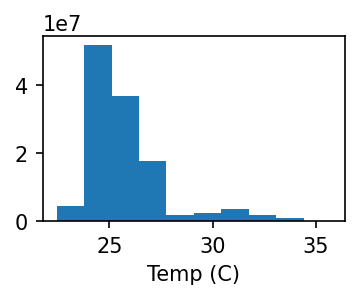

In [6]:
plt.figure(figsize=(2.6,1.6),dpi=150)
plt.hist(np.ravel(video.data));
plt.xlabel('Temp (C)')


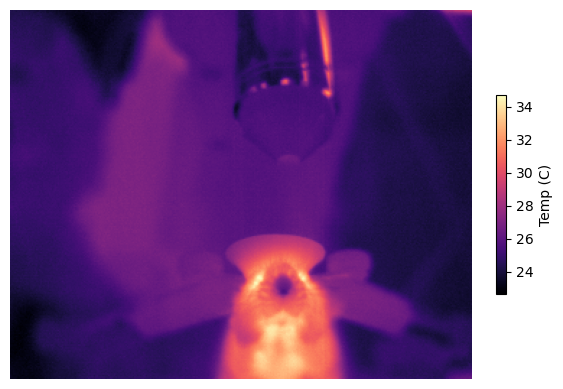

In [7]:
plt.imshow(np.mean(video.data, axis=0), 'magma')
plt.axis('off')
plt.colorbar(fraction=.02, label='Temp (C)')


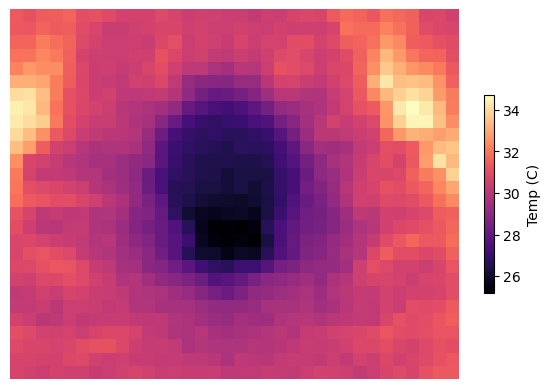

In [8]:
plt.imshow(video.data[111,178:206,172:206], 'magma')
plt.axis('off')
plt.colorbar(fraction=.02, label='Temp (C)')


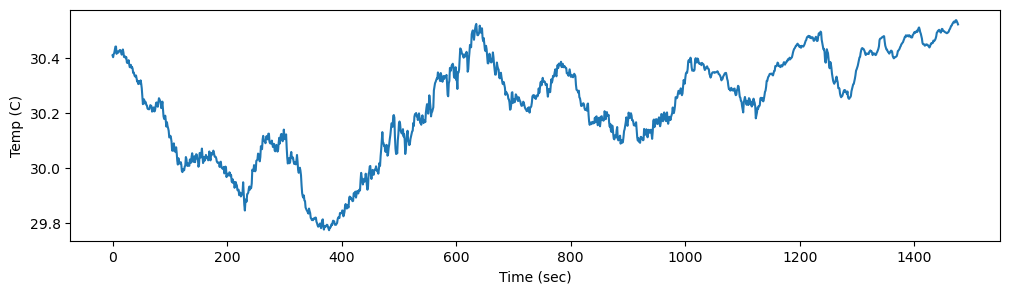

In [9]:
plt.figure(figsize=(12,3))
plt.plot(video.data[:,178:206,172:206].reshape(video.data.shape[0],-1).mean(axis=1))
plt.ylabel('Temp (C)');
plt.xlabel('Time (sec)');
